# **Cricket Match Outcome Prediction: Feature Generation**

## **Problem Description**:
The goal of this project is to predict the outcome of a cricket match (Win, Loss, or Draw) based on various match-related features, including player performance, team stats, environmental factors, and historical data. The model can be trained on past match data to provide predictions for future matches, assisting fans, analysts, and even betting platforms in understanding match dynamics.

## **Features**

### 1. **Team Batting Average**
   **Description:** The average runs scored by the team in the last 5 matches.  
   **Logic:** Higher values indicate stronger batting performance, considering the match format (ODI, T20, Test).

### 2. **Team Bowling Average**
   **Description:** Average runs conceded per wicket by the team in the last 5 matches.  
   **Logic:** Lower values indicate stronger bowling performance, taking into account pitch conditions (e.g., spin-friendly pitches).

### 3. **Win-Loss Ratio**
   **Description:** The ratio of matches won to lost in the team’s last 10 games.  
   **Logic:** A higher ratio reflects consistent performance, with outliers showing teams with perfect or poor records.

### 4. **Home/Away Game**
   **Description:** Indicates whether the match is at the team's home ground, away, or neutral venue.  
   **Logic:** Home games generally favor the team due to familiarity with the conditions and crowd support.

### 5. **Recent Form**
   **Description:** The number of matches won by the team in their last 5 games.  
   **Logic:** Strong recent form (4-5 wins) suggests better chances, while weak form (0-2 wins) suggests a challenging match.

### 6. **Team Experience**
   **Description:** Cumulative matches played by all players in the team.  
   **Logic:** More experienced teams handle pressure situations better, considering squad changes like injuries or retirements.

### 7. **Batting Depth**
   **Description:** The number of capable batsmen in the lineup.  
   **Logic:** Higher depth reduces the chances of a batting collapse, with T20 teams having more batting depth than Test teams.

### 8. **Bowling Depth**
   **Description:** The number of quality bowlers in the lineup.  
   **Logic:** Higher bowling depth provides better options for controlling the opposition’s scoring.

### 9. **Weather Conditions**
   **Description:** Expected weather conditions during the match.  
   **Logic:** Overcast conditions favor bowlers (especially swing bowlers), while rainy conditions may lead to match interruptions.

### 10. **Pitch Type**
   **Description:** Indicates the nature of the pitch (batting-friendly, spin-friendly, or fast-bowler-friendly).  
   **Logic:** Spin-friendly pitches favor spin bowlers, while batting-friendly pitches lead to higher scores.

### 11. **Match Format**
   **Description:** The format of the match (Test, ODI, or T20).  
   **Logic:** Different formats demand different strategies, affecting batting, bowling, and overall game approach.

### 12. **Toss Winner**
   **Description:** The team that wins the toss before the match.  
   **Logic:** Toss winners have an advantage in conditions like dew or overcast skies, affecting decisions like batting/fielding.

### 13. **Team's Overall Batting Strength**
   **Description:** Aggregated performance score of the top 5 batsmen based on recent matches.  
   **Logic:** Stronger batting strength increases the team's chances of posting high scores and chasing successfully.

### 14. **Team's Overall Bowling Strength**
   **Description:** Aggregated performance score of the top 5 bowlers based on recent matches.  
   **Logic:** A higher bowling strength implies a better ability to restrict the opponent's score and take wickets.

### 15. **Head-to-Head Results**
   **Description:** Historical win/loss record between the two teams in the same match format.  
   **Logic:** A team with a strong historical record may have a psychological edge in the match.

### 16. **Fielding Efficiency**
   **Description:** Percentage of successful catches, run-outs, and stops made by the fielding team.  
   **Logic:** Higher efficiency can swing the game in favor of a team, especially in close matches.

### 17. **Captain’s Score**
   **Description:** A composite score based on the captain's leadership and performance.  
   **Logic:** A strong captain can inspire better team performance and handle crucial moments effectively.

### **Target Variable: Match Outcome**
   **Description:** Outcome of the match (Win, Loss, Draw)  
   **Logic:** Calculated based on various factors like batting strength, bowling strength, and historical performance between teams. 
   - **1 (Win):** Team A is expected to win
   - **0 (Loss):** Team B is expected to win
   - **2 (Draw):** The match is likely to end in a draw.


In [1]:
import warnings
warnings.filterwarnings("ignore")

## **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer

In [3]:
df = pd.read_csv("Match_Prediction.csv")

In [4]:
df.head()

,Match_Format,Team_Batting_Average,Pitch_Type,Team_Bowling_Average,Home_Away_Game,Recent_Form,Team_Experience,Batting_Depth,Bowling_Depth,Weather_Conditions,Toss_Winner,Batting_Strength,Bowling_Strength,Team_A_Country,Team_B_Country,Head_to_Head,Fielding_Efficiency,Captains_Score,Match_Outcome
0,1,276,2,29,2,5,1319,7,4,Overcast,0,307,21,Sri Lanka,Afghanistan,3.190290,0.792599,3,1
1,2,210,0,43,0,2,1185,10,3,Overcast,1,364,18,Ireland,India,0.379269,0.534745,7,0
2,2,157,1,28,2,2,511,10,3,Humid,1,355,24,England,Australia,2.111680,0.612869,8,1
3,1,205,2,24,1,2,559,8,4,Humid,1,322,26,India,Zimbabwe,3.215836,0.646770,7,0
4,0,440,0,55,1,2,863,5,6,Humid,0,271,39,New Zealand,South Africa,2.121134,0.836674,5,2


In [5]:
df.shape

(30000, 19)

## **Adding Noise**

#### ***1. Add Missing Data***

In [6]:
import random
import numpy as np

# 1. Add Missing Data (NaN) to numeric columns, excluding target variable
def add_missing_data(df, target_column, percentage=0.01):
    num_missing = int(len(df) * percentage)  # Number of rows to make missing
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    columns_to_modify = [col for col in numeric_columns if col != target_column]

    for column in columns_to_modify:
        missing_indices = random.sample(range(len(df)), num_missing)  # Random indices for missing values
        df.loc[missing_indices, column] = np.nan
    return df

In [7]:
df = add_missing_data(df, target_column='Match_Outcome', percentage=0.02)

#### ***2. Add Duplicate Rows***

In [8]:
# 2. Add Duplicate Rows
def add_duplicates(df, percentage=0.25):
    num_duplicates = int(len(df) * percentage)
    duplicate_rows = df.sample(n=num_duplicates, replace=True)
    df = pd.concat([df, duplicate_rows], ignore_index=True)
    return df

In [9]:
df = add_duplicates(df)

#### ***3. Add Outliers***

In [10]:
# 3. Add Outliers
def add_outliers(df):
    outlier_value = random.randint(1,1000)  # Example for batting average
    column = 'Team_Batting_Average'
    num_outliers = int(len(df) * 0.15)  # Add outliers to 15% of the rows
    outlier_indices = random.sample(range(len(df)), num_outliers)
    for index in outlier_indices:
        df.loc[index, column] = outlier_value
    return df

In [11]:
df = add_outliers(df)

#### ***4. Add Noisy Categorical Data***

In [12]:
# 4. Add Noisy Categorical Data
def add_noisy_categories(df, column):
    valid_categories = df[column].unique()
    num_noisy = int(len(df) * 0.15)  # Add noise to 5% of the column
    for idx in random.sample(range(len(df)), num_noisy):
        df.loc[idx, column] = random.choice([category for category in ['Invalid', 'Unknown'] if category not in valid_categories])
    return df

In [13]:
df = add_noisy_categories(df, 'Weather_Conditions')

#### ***5. Add Random Perturbation to Numerical Features***

In [14]:
# 5. Add Random Perturbation to Numerical Features
def add_random_perturbation(df, column, noise_range=20):
    noise = np.random.randint(-noise_range, noise_range, size=len(df))
    df[column] = df[column] + noise
    return df

In [15]:
df = add_random_perturbation(df, 'Team_Batting_Average')

In [16]:
df.head()

,Match_Format,Team_Batting_Average,Pitch_Type,Team_Bowling_Average,Home_Away_Game,Recent_Form,Team_Experience,Batting_Depth,Bowling_Depth,Weather_Conditions,Toss_Winner,Batting_Strength,Bowling_Strength,Team_A_Country,Team_B_Country,Head_to_Head,Fielding_Efficiency,Captains_Score,Match_Outcome
0,1.0,264.0,2.0,29.0,2.0,5.0,1319.0,7.0,4.0,Unknown,0.0,307.0,21.0,Sri Lanka,Afghanistan,3.190290,0.792599,3.0,1
1,2.0,525.0,0.0,43.0,0.0,2.0,1185.0,10.0,3.0,Overcast,1.0,364.0,18.0,Ireland,India,0.379269,0.534745,7.0,0
2,2.0,157.0,1.0,28.0,2.0,2.0,511.0,10.0,3.0,Humid,1.0,355.0,24.0,England,Australia,2.111680,0.612869,8.0,1
3,1.0,198.0,2.0,24.0,1.0,2.0,559.0,8.0,4.0,Humid,1.0,322.0,26.0,India,Zimbabwe,3.215836,0.646770,7.0,0
4,0.0,445.0,0.0,55.0,1.0,2.0,863.0,5.0,6.0,Humid,0.0,271.0,39.0,New Zealand,South Africa,2.121134,0.836674,5.0,2


In [17]:
df['Match_Outcome'].value_counts()

Match_Outcome
1    16983
2    14869
0     5648
Name: count, dtype: int64

## **Model Training on Unprocessed Dataset**

Before training the model, we will ensure the data is in the right format. For that, we need to:

1. Handle **categorical data** by encoding it using Label Encoding or One-Hot Encoding.
2. Handle missing data.
3. Split the data into training and testing sets.
4. Train a model and evaluate its performance using the unprocessed data.

#### ***Handling Missing Values***

In [18]:
df.shape

(37500, 19)

In [19]:
df.isnull().sum()

Match_Format            725
Team_Batting_Average    630
Pitch_Type              749
Team_Bowling_Average    761
Home_Away_Game          752
Recent_Form             743
Team_Experience         745
Batting_Depth           749
Bowling_Depth           756
Weather_Conditions        0
Toss_Winner             738
Batting_Strength        763
Bowling_Strength        733
Team_A_Country            0
Team_B_Country            0
Head_to_Head            728
Fielding_Efficiency     742
Captains_Score          753
Match_Outcome             0
dtype: int64

### Why Drop Rows with Missing Values?

1. **Feature Dependency**: Features like **Match Format** affect others (e.g., **Batting Average**), so imputation can mislead.

2. **Model Accuracy**: Wrongly filled values confuse the model and reduce accuracy.

3. **Enough Data**: After dropping, 28,000+ rows remain, which is sufficient.

In [20]:
numerical_fea = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [21]:
data = df.dropna()

In [22]:
#imputer = KNNImputer(n_neighbors=5)
#df[numerical_fea] = imputer.fit_transform(df[numerical_fea])

In [23]:
#data = df.copy()

In [24]:
data.shape

(27818, 19)

In [25]:
data.isnull().sum()

Match_Format            0
Team_Batting_Average    0
Pitch_Type              0
Team_Bowling_Average    0
Home_Away_Game          0
Recent_Form             0
Team_Experience         0
Batting_Depth           0
Bowling_Depth           0
Weather_Conditions      0
Toss_Winner             0
Batting_Strength        0
Bowling_Strength        0
Team_A_Country          0
Team_B_Country          0
Head_to_Head            0
Fielding_Efficiency     0
Captains_Score          0
Match_Outcome           0
dtype: int64

#### ***Handling Categorical Columns***

In [26]:
# Encode all categorical columns (for simplicity, applying to all columns)
categorical_columns = ['Home_Away_Game', 'Weather_Conditions', 'Pitch_Type', 
                       'Match_Format', 'Toss_Winner', 'Team_A_Country', 'Team_B_Country']

In [27]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [28]:
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [29]:
data.shape

(27818, 19)

## **Train Model on Unprocessed Data**

We will now split the dataset into training and testing sets, train a **RandomForestClassifier**, and evaluate its performance on the unprocessed data.

#### ***Train/Test Split***

In [30]:
# Split the dataset into features and target variable
X = data.drop('Match_Outcome', axis=1)  # Features
y = data['Match_Outcome']  # Target variable

In [31]:
# Split into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

In [33]:
print(y_train.unique())  # Check unique values in the target


[1 2 0]


In [34]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [36]:
# Predict on the test set
y_train_pred = rf_model.predict(X_train)

In [37]:
# Evaluate the model performance
accuracy_unprocessed = accuracy_score(y_test, y_pred)
print(f"Accuracy on Unprocessed Dataset: {accuracy_unprocessed:.4f}")

Accuracy on Unprocessed Dataset: 0.7734


In [38]:
# Evaluate the model performance
accuracy_unprocessed = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy on Unprocessed Dataset: {accuracy_unprocessed:.4f}")

Train Accuracy on Unprocessed Dataset: 1.0000


#### ***Correlation Heatmap***
A heatmap will help us identify correlations between numerical features, which will inform us about potential feature importance and redundancy.

In [39]:
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

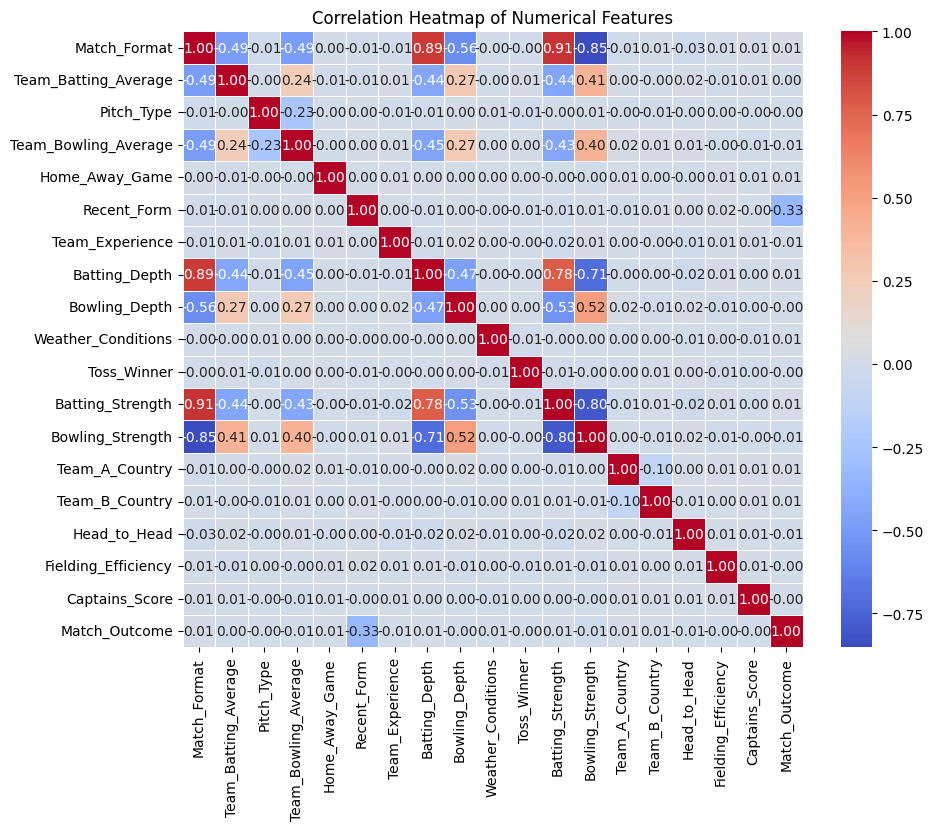

In [40]:
# Correlation heatmap to visualize relationships between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#### ***Box Plots for Feature Distribution and Outliers***
Box plots will help visualize outliers and understand the spread of the features. We'll focus on identifying outliers in numerical features.

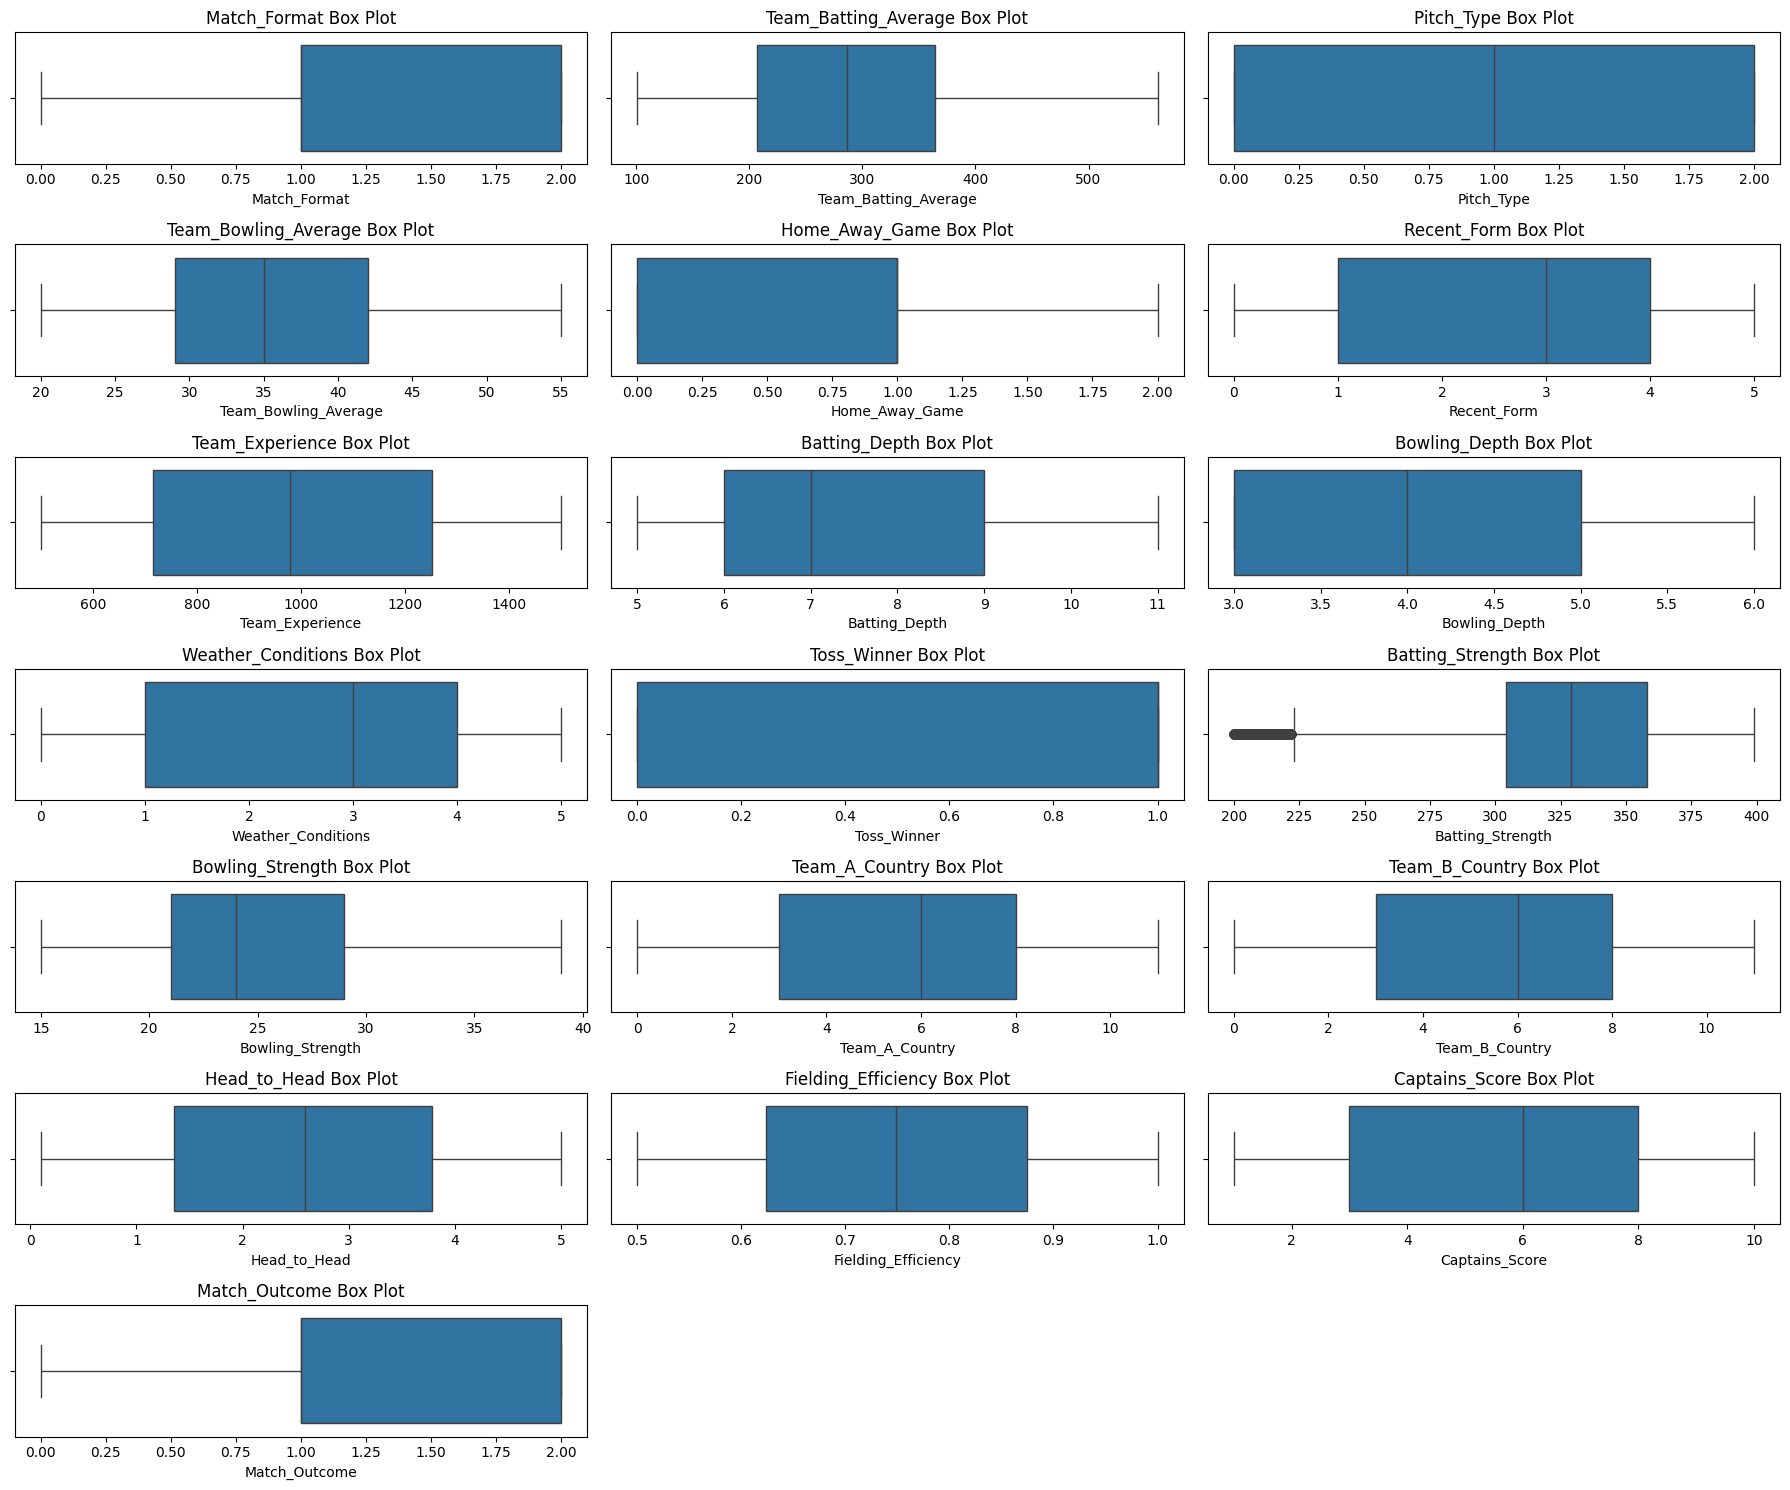

In [41]:
# Dynamically set the number of rows and columns based on the number of features
num_features = len(numerical_features)
ncols = 3  # You can adjust this based on how you want the layout
nrows = (num_features // ncols) + (num_features % ncols > 0)

# Plot boxplots (example of one visualization step) after removing outliers
plt.figure(figsize=(18, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(nrows, ncols, i)  # Adjust the grid size dynamically
    sns.boxplot(x=data[feature])  # Example of a visualization (boxplot)
    plt.title(f'{feature} Box Plot')
    plt.tight_layout()

plt.show()

## **Pre-Processing**

#### ***Drop rows containing noisy categorical values.***

In [42]:
#Drop rows containing noisy categorical values.
def drop_noisy_categories(df, column):
    print(f"Before dropping noisy categories in {column}:")
    print(df[column].value_counts())
    
    # Drop rows with 'Invalid' or 'Unknown' categories
    df = df[~df[column].isin(['Invalid', 'Unknown'])]
    
    print(f"After dropping noisy categories in {column}:")
    print(df[column].value_counts())
    
    return df

In [43]:
# Assume 'Country' is the column with noise
data = drop_noisy_categories(data, 'Weather_Conditions')

Before dropping noisy categories in Weather_Conditions:
Weather_Conditions
3    5982
4    5942
0    5852
2    5814
5    2117
1    2111
Name: count, dtype: int64
After dropping noisy categories in Weather_Conditions:
Weather_Conditions
3    5982
4    5942
0    5852
2    5814
5    2117
1    2111
Name: count, dtype: int64


#### ***Handling Duplicates***
Duplicates can skew your model's performance, so we need to remove them.

In [44]:
# Remove duplicate rows from the dataset
data.drop_duplicates(inplace=True)

In [45]:
data.shape

(27737, 19)

#### ***Outlier Detection and Removal using LOF***
In this step, we will:
1. Visualize the outliers for each feature using box plots.
2. Detect outliers using **Local Outlier Factor (LOF)**, a method that identifies points that are significantly different from their neighbors.
3. Remove the identified outliers from the dataset.

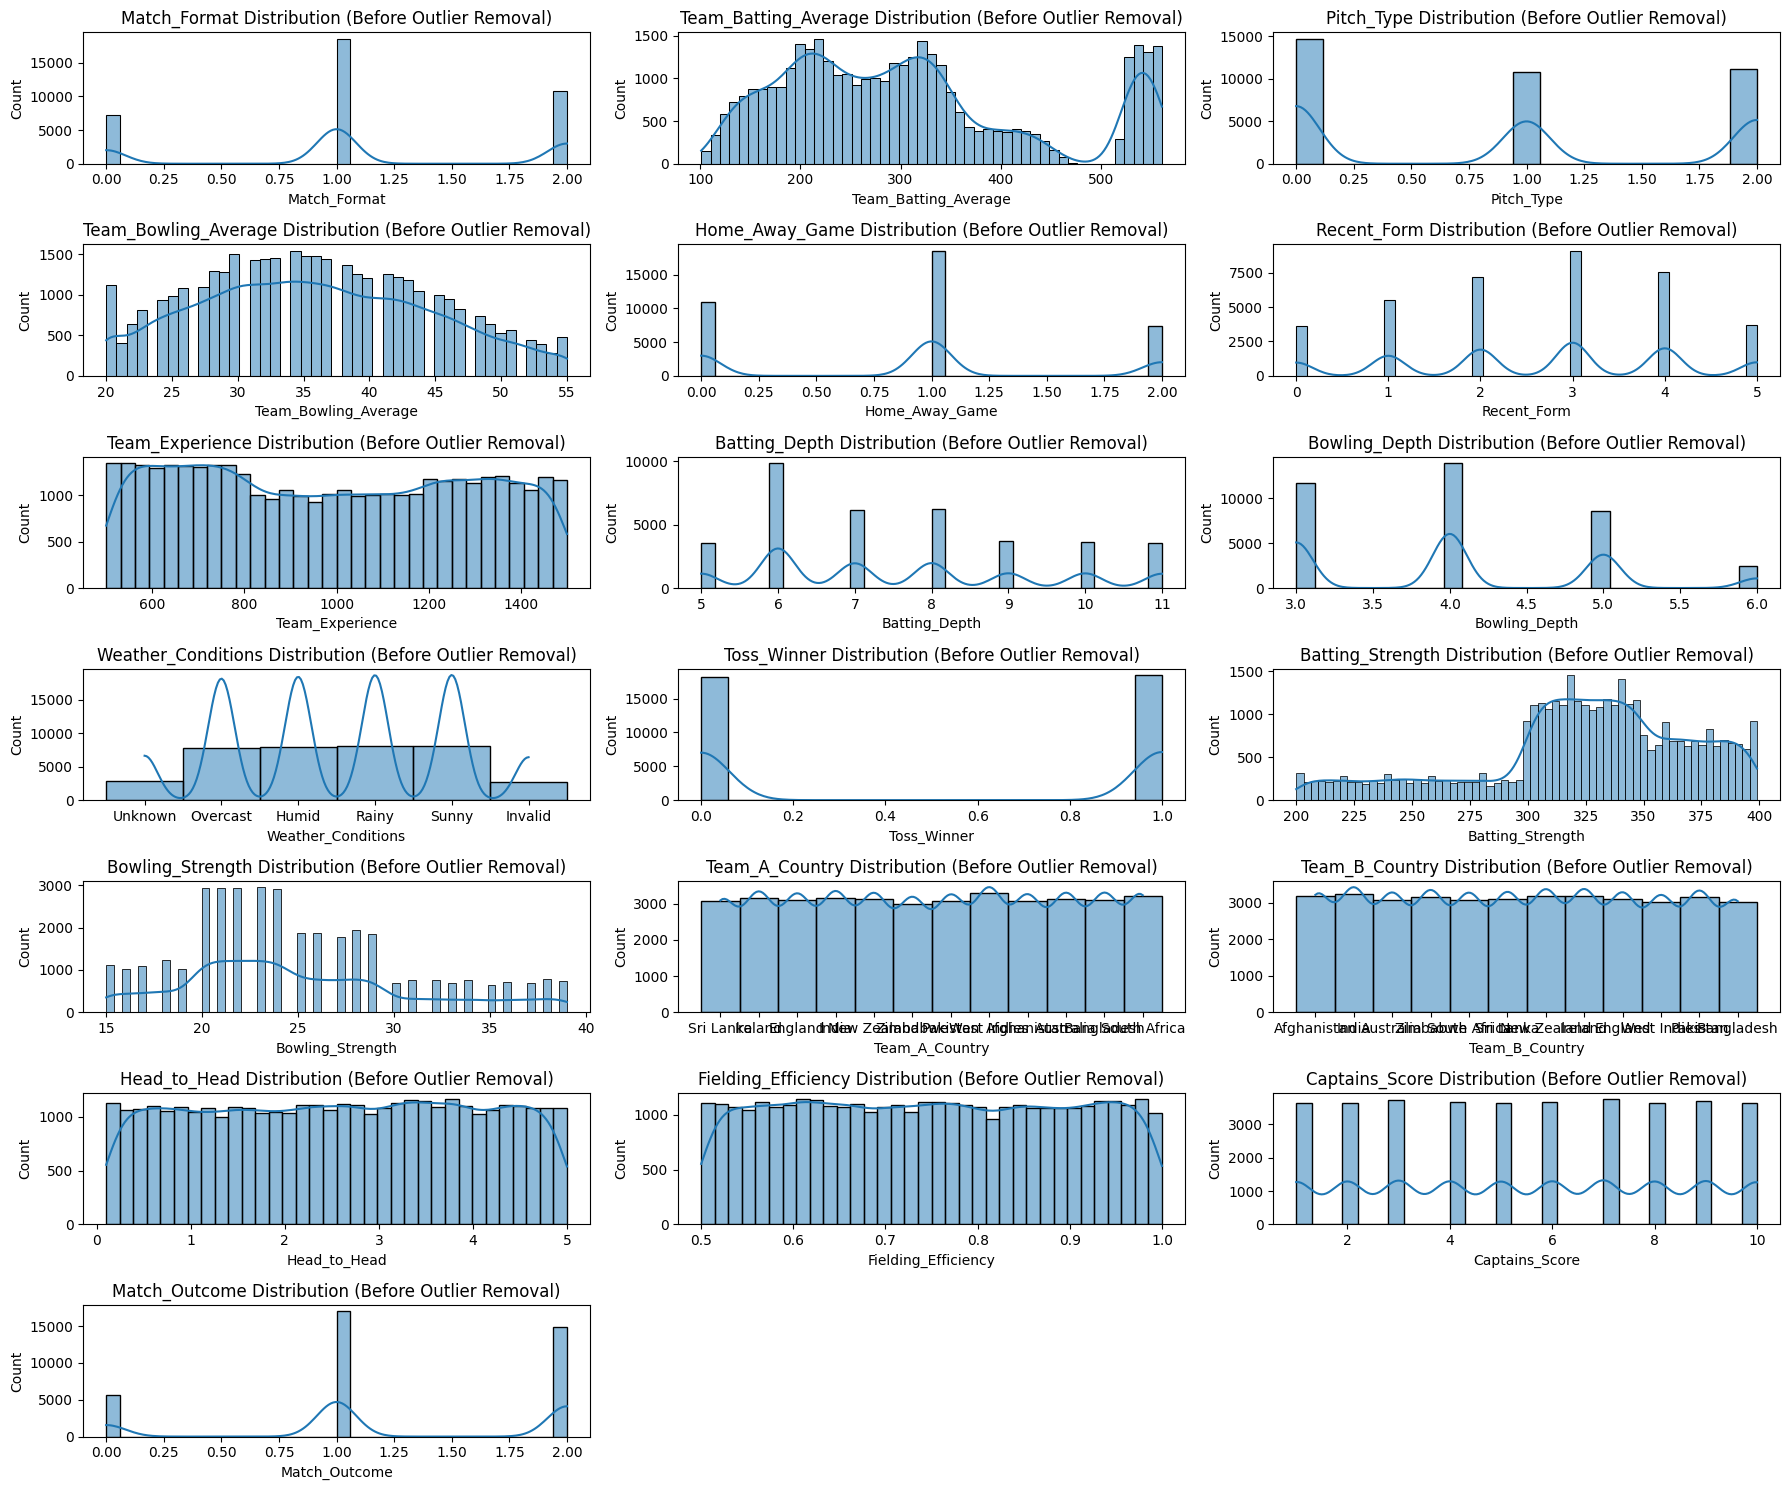

In [46]:
# Dynamically set the number of rows and columns based on the number of features
num_features = len(numerical_features)
ncols = 3  # You can adjust this based on how you want the layout
nrows = (num_features // ncols) + (num_features % ncols > 0)

# Plot before removing outliers
plt.figure(figsize=(18, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(nrows, ncols, i)  # Adjust the grid size dynamically
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution (Before Outlier Removal)')
    plt.tight_layout()

plt.show()

In [47]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df):
    # Loop through numerical columns to calculate IQR and remove outliers
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the acceptable range for data
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

In [48]:
# Remove outliers
data = remove_outliers_iqr(data)
print(f"Data shape after removing outliers: {data.shape}")

Data shape after removing outliers: (26017, 19)


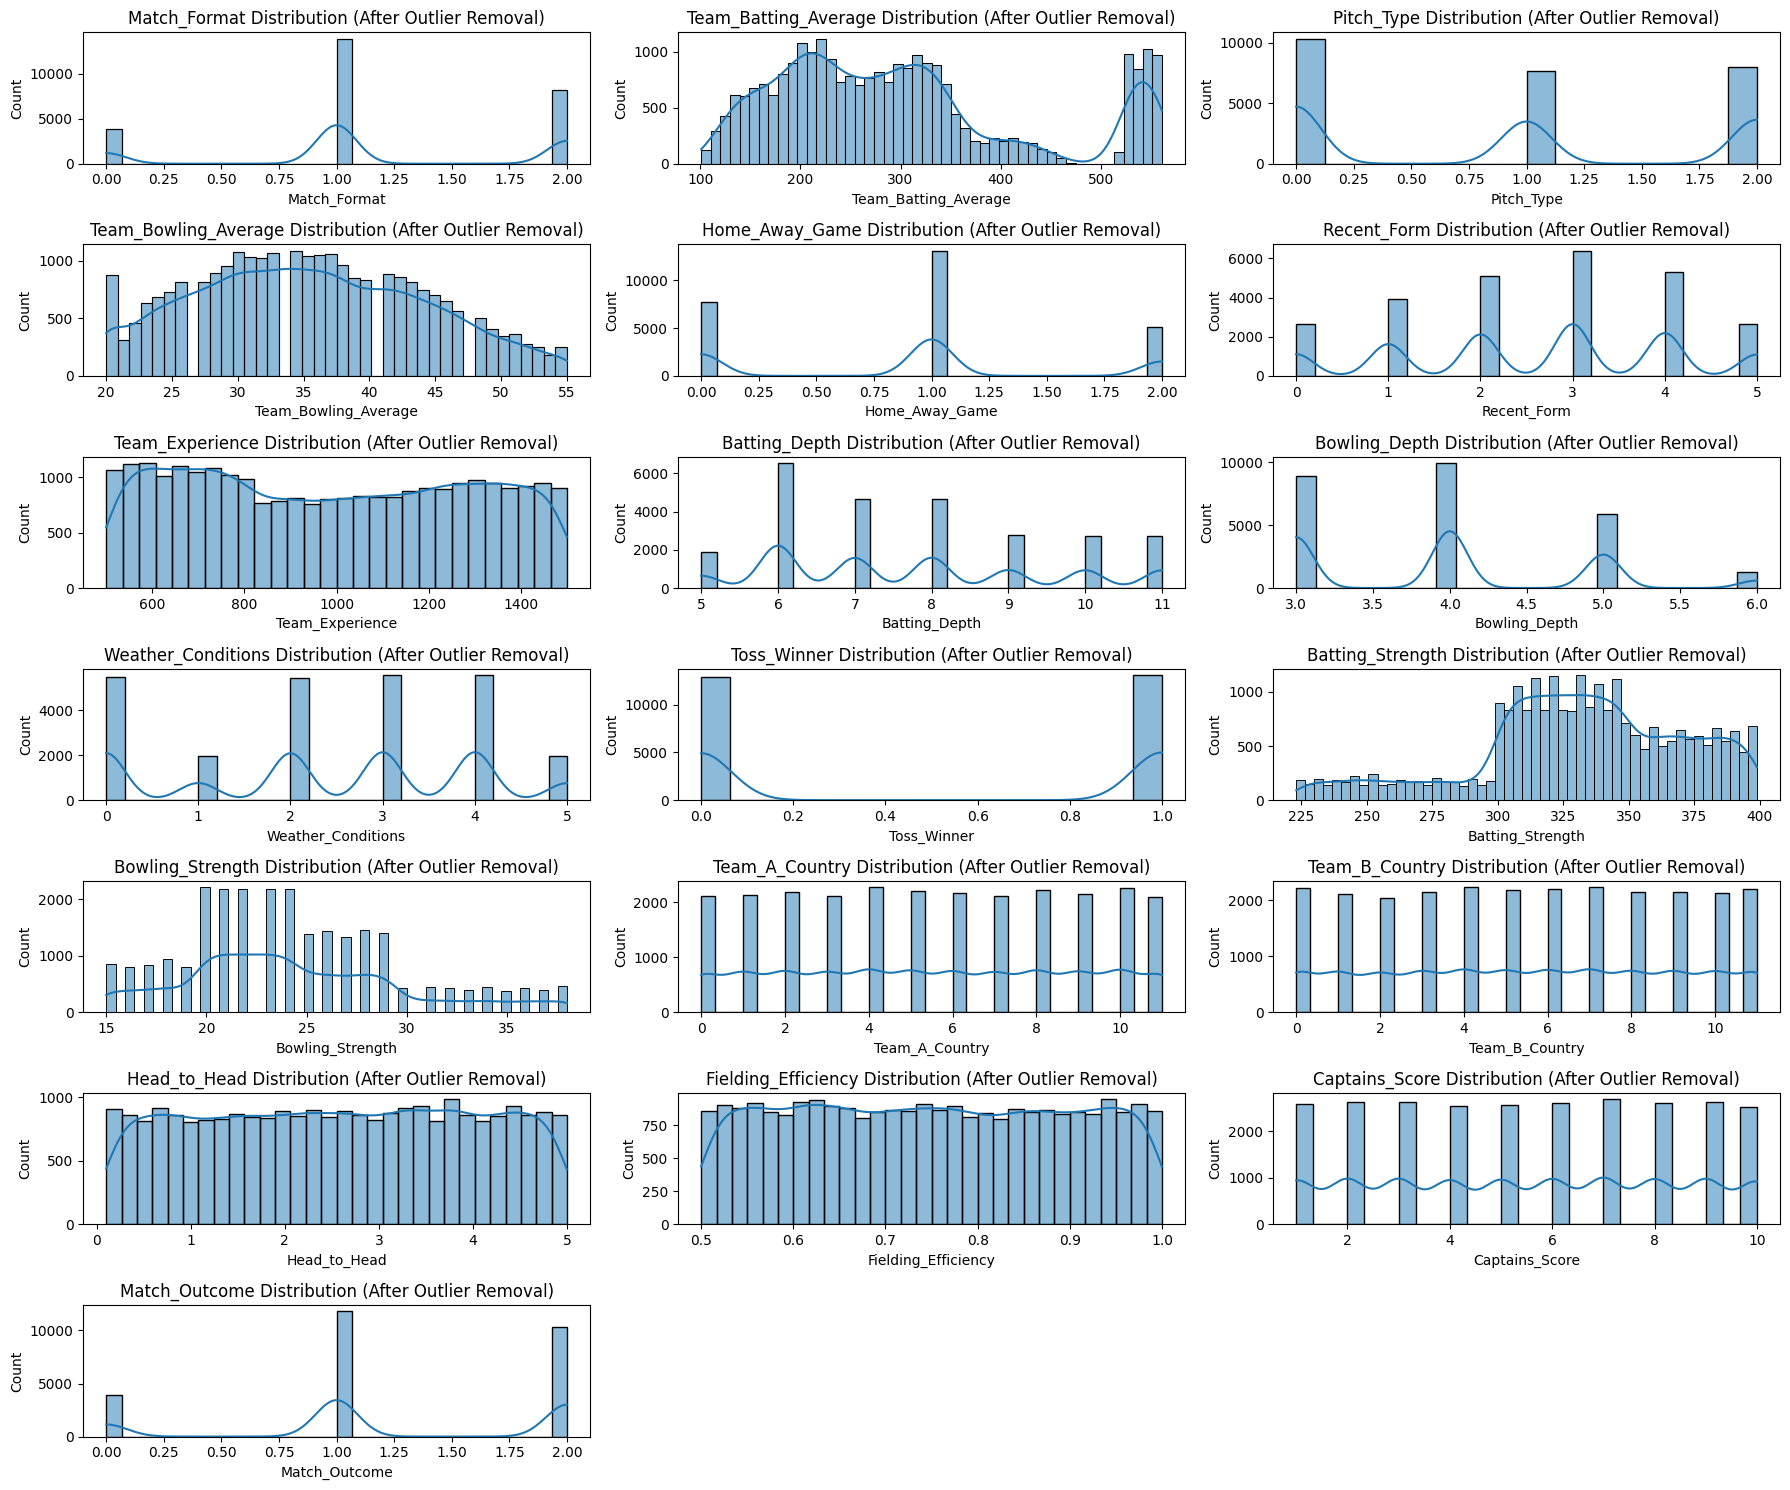

In [49]:
# Plot after removing outliers (using IQR method)
plt.figure(figsize=(18, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(nrows, ncols, i)  # Adjust the grid size dynamically
    sns.histplot(data[feature], kde=True)
    plt.title(f'{feature} Distribution (After Outlier Removal)')
    plt.tight_layout()

plt.show()

### ***Target Variable Distribution***
Understanding the distribution of the target variable (match outcome) is important for the model. This visualization will show the distribution of wins, losses, and draws.

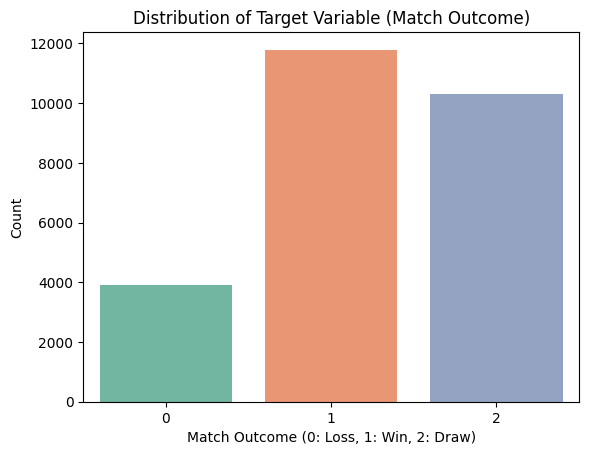

In [50]:
# Visualizing the distribution of the target variable
sns.countplot(x='Match_Outcome', data=data, palette='Set2')
plt.title('Distribution of Target Variable (Match Outcome)')
plt.xlabel('Match Outcome (0: Loss, 1: Win, 2: Draw)')
plt.ylabel('Count')
plt.show()

## **Feature Engineering**
Feature engineering can improve model performance by creating new features or modifying existing ones.

In [51]:
# Create a new feature 'Batting to Bowling Strength Ratio'
#data['Overall_Strength'] = data['Batting_Strength'] / data['Bowling_Strength']

## **Dimensionality Reduction**
If needed, we can apply PCA to reduce the number of features while retaining essential information.

In [52]:
dataset = data.copy()

In [53]:
# Apply PCA for dimensionality reduction (if necessary)
pca = PCA(n_components=12)  # Set the number of components as per the need
data_pca = pca.fit_transform(dataset.drop('Match_Outcome', axis=1))  # Assuming 'Target' is the column to predict

In [54]:
# Add the PCA components to the original dataframe
df_pca_df = pd.DataFrame(data_pca, columns=[f'PCA_{i}' for i in range(1, 13)])
df_pca = pd.concat([dataset, df_pca_df], axis=1)

### ***Train/Test Split***

In [55]:
# Split the dataset into features and target variable
X = data.drop('Match_Outcome', axis=1)  # Features
y = data['Match_Outcome']  # Target variable

#### ***Feature Scaling/Normalization***
Scaling numerical features ensures all features contribute equally to model training.

In [56]:
target_col = 'Match_Outcome'
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.drop(target_col)

In [57]:
scaler = StandardScaler()

In [58]:
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [59]:
X.head()

,Match_Format,Team_Batting_Average,Pitch_Type,Team_Bowling_Average,Home_Away_Game,Recent_Form,Team_Experience,Batting_Depth,Bowling_Depth,Weather_Conditions,Toss_Winner,Batting_Strength,Bowling_Strength,Team_A_Country,Team_B_Country,Head_to_Head,Fielding_Efficiency,Captains_Score
0,-0.256921,-0.275825,1.307145,-0.747328,1.576090,1.629435,1.122971,-0.407040,0.019568,1.651483,-1.007988,-0.601499,-0.609838,1.015055,-1.598718,0.443355,0.301707,-0.870451
1,1.257421,1.796669,-1.088374,0.867577,-1.291302,-0.406798,0.673887,1.259095,-1.121940,-0.234618,0.992075,0.823968,-1.163013,-0.148669,-0.438863,-1.545025,-1.477600,0.525350
2,1.257421,-1.125468,0.109385,-0.862678,1.576090,-0.406798,-1.584942,1.259095,-1.121940,-1.492019,0.992075,0.598894,-0.056663,-0.730531,-1.308754,-0.319601,-0.938513,0.874300
3,-0.256921,-0.799904,1.307145,-1.324080,0.142394,-0.406798,-1.424076,0.148338,0.019568,-1.492019,0.992075,-0.226376,0.312120,-0.439600,1.590882,0.461426,-0.704580,0.525350
6,-1.771262,0.931145,-1.088374,0.752227,0.142394,0.950691,-1.336940,-1.517796,0.019568,0.394083,-1.007988,-1.251712,1.971644,0.433193,-1.308754,-0.400377,-1.657861,0.176400


## **Modelling After pre-Processing**

### Random Forest Model Implementation

1. **Split the Data**: First, we will split the dataset into training and testing sets.
2. **Model Training**: We will train a Random Forest classifier on the training data.
3. **Model Evaluation**: We will evaluate the model using accuracy and other metrics.
4. **Feature Importance**: Visualize the feature importance to understand which features contribute the most.


In [60]:
# Split into training and testing sets (85% training, 15% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [61]:
# Initialize RandomForestClassifier
model = RandomForestClassifier(random_state=42)

In [62]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [63]:
y_pred_proc = model.predict(X_test)

In [64]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred_proc)
print(f"Accuracy on Processed Dataset: {accuracy:.4f}")

Accuracy on Processed Dataset: 0.7845
